# Multivariate Skew-Normal Mixture Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from mvem.stats import multivariate_skewnorm as mvsn
from mvem.mixture import skewnorm

## Data

We generate some simple sample data from a skew-normal mixture.

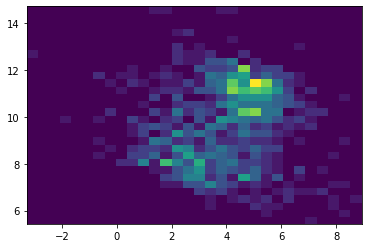

In [2]:
g = 2
pi = [0.6, 0.4]
mu = [[3, 7], [5, 12]]
shape = [[[3, -0.2], [-0.2, 6]], [[1, 0], [0, 2]]]
lmbda = [[3, 12], [-1, -4]]
x = skewnorm.rvs(pi, mu, shape, lmbda, size=1000)

_ = plt.hist2d(x[:, 0], x[:, 1], bins=30)

## Fit Mixture Model Using an EM-Algorithm

In [3]:
result = skewnorm.fit(x, g, error=1e-6)

In-sample fit on histogram of train data:

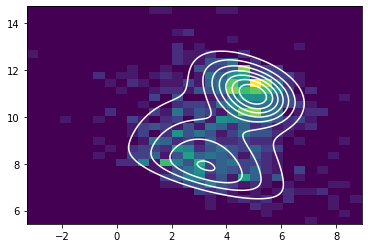

In [4]:
xmin = np.min(x, axis=0)
xmax = np.max(x, axis=0)
X    = np.linspace(xmin[0], xmax[0], 300)
Y    = np.linspace(xmin[1], xmax[1], 300)
X, Y = np.meshgrid(X, Y)
pos  = np.dstack((X, Y))
Z = skewnorm.pdf(pos, result["pi"], result["mu"], result["Sigma"], result["shape"])
Z = Z / Z.sum()

plt.hist2d(x[:, 0], x[:, 1], bins=30)
plt.contour(X, Y, Z, colors="white")

## Generate Some Test Data

In [5]:
from mvem.stats import multivariate_skewnorm as mvsn

def generate_test(g, pi, mu, shape, lmbda, size=500):
    w = np.random.choice(np.arange(len(pi)), p=pi, size=size)
    sample = []
    for j in range(size):
        i = w[j]
        sample += [mvsn.rvs(mu[i], shape[i], lmbda[i], 1)]
    sample = np.concatenate(sample, axis=0)
    return sample, w

x_test, y_test = generate_test(g, pi, mu, shape, lmbda)

## Predict Class Belonging

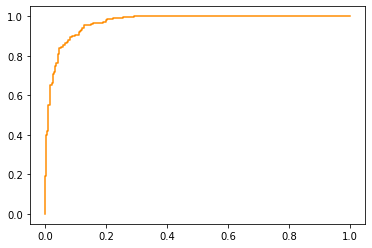

In [6]:
from sklearn.metrics import roc_curve

# predict probability of belonging to the different classes
prob = skewnorm.predict(x_test, result["mu"], result["Sigma"], result["shape"])

# roc curve
index = 1 if np.mean(y_test == np.argmax(prob, axis=1)) > 0.5 else 0
fpr, tpr, thresholds = roc_curve(y_test, prob[:, index])
plt.plot(fpr, tpr, color="darkorange")
plt.show()